# Clustering

# Índice 
1. [Introduction](#introduction)
2. [Import Materials](#importmaterials)    
    2.1. [Import Libraries](#importlibraries)     
    2.2. [Import the dataset](#importdataset)
3. [Data Exploration](#dataanalysis)    
    3.1. [Dataset Overview](#overview)   
    3.2. [Duplicates](#duplicates)     
    3.3. [Data Types](#datatypes)   
    3.4. [Strange Values](#strangevalues)    
    3.5. [Missing Values](#missingvalues)         
4. [Feature Engineering](#featureengineering)    
5. [Scaling Methods](#scaling)      
6. [PCA](#pca)
7. [Clustering Algorithms](#clusteringalgorithms) <br>
    7.1. [Hierarchical Clustering](#hierarchicalclustering)
7. [RFM Analysis](#rfm)

<hr>
<a class="anchor" id="introduction">
    
# 1. Introduction
    
</a>


This notebook analyzes customer data from ABCDEats Inc., a fictional food delivery service, over three months. The goal is to create clusters of customers and make different marketing startegies for each of them....    
**Project by** Dinis Pinto (20240612), Joana Rodrigues (20240603), João Marques (20240656), and Mara Simões (20240326) - **Group 27**.

<hr>
<a class="anchor" id="importmaterials">
    
# 2. Import Materials
    
</a>

<hr>
<a class="anchor" id="importlibraries">
    
## 2.1. Import Libraries
    
</a>

For this project, we'll install some helpful libraries to make analysis easier and add features like better plotting, data handling, and modeling tools. For example, `matplotlib` and `seaborn` allow us to create clear, customizable plots, while `pandas` and `numpy` make data processing smoother.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer


<hr>
<a class="anchor" id="importdataset">
    
## 2.2. Import Dataset
    
</a>

### Data in dataset
The different columns in the dataset give out the following information:   
- `customer_id` - Unique identifier for each customer.
- `customer_region` - Geographic region where the customer is located.
- `customer_age` - Age of the customer.
- `vendor_count` - Number of unique vendors the customer has ordered from.
- `product_count` - Total number of products the customer has ordered.
- `is_chain` - Indicates whether the customer’s order was from a chain restaurant.
- `first_order` - Number of days from the start of the dataset when the customer first placed an order.
- `last_order` - Number of days from the start of the dataset when the customer most recently placed an order.
- `last_promo` - The category of the promotion or discount most recently used by the customer.
- `payment_method` - Method most recently used by the customer to pay for their orders.
- `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`... - The amount in monetary units spent by the customer from the indicated type of cuisine. 
- `DOW_0` to `DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- `HR_0` to `HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv',sep=',') # import the data

<hr>
<a class="anchor" id="datapreprocessing">
    
# 3. Data Exploration
</a>

<hr>
<a class="anchor" id="overview">
    
## 3.1. Dataset Overview
</a>
This subsection is meant to help visualize the data in the file to understand what the necessary steps will be in data preprocessing.

In [3]:
df.head() # To visualize the first lines of the dataset

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(2) # to check if the last row is not the sum of all values in each column to avoid false outliers
# In this case there is no agreegation of values in the last column.

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.shape

(31888, 56)

In [6]:
df.info() # Allows to verify the different types of data and the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

Describing the numerical variables gives us fundamental characteristics that can helps us through the analysis

In [7]:
df.describe().T # We invert the columns to be able to see all data

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In the next step, a description of the categorical variables is provided.

In [8]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


The column `customer_id` only has values in 31'888 rows. However, only 31'875 of these are unique. This means there are customers appearing twice which can be caused by rows that are duplicated. We'll analyse this better in the next section to be able to jump into more fundamented conclusions. 

<hr>
<a class="anchor" id="duplicates">
    
## 3.2. Duplicates
</a>

Taking into account that there are customers appearing twice, we will go through the dataset to see if there are duplicated rows. 
As this dataset is very complex and with a lot of columns, if we find rows with exactly the same information, it is really likely that they are indeed duplicated and therefore should be erased.

In [9]:
df.duplicated().sum() # checks how many rows are duplicated rows

# For verification purposes we can use the following code, that shows the duplicates of 'customer_id' with all columns for better understanding
# df[df['customer_id'].duplicated(keep=False)].sort_values(by='customer_id')

13

We found 13 duplicates but as they are all repeated information and therefore don't add anything new to our analysis, we erase them.

In [10]:
df.drop_duplicates(inplace=True) # to drop duplicates

In [11]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31875,31875,1b8f824d5e,1
customer_region,31875,9,8670,9761
last_promo,31875,4,-,16744
payment_method,31875,3,CARD,20153


As we drop the duplicates, the customer_id is left with only unique values.

<hr>
<a class="anchor" id="datatypes">
    
## 3.3. Data types
</a>

Accurate data types are essential, so we’ll adjust them accordingly: `customer_age` and `first_order` should be integers instead of floats. The metadata for `is_chain` suggests it’s binary, but it isn’t; we’ll investigate this discrepancy.

In [12]:
df.customer_age = df.customer_age.astype("Int64")
df.first_order = df.first_order.astype("Int64")

# Change customer_age and first order to Int64 (Int64 so they can handle missing values)
# We can use df.dtypes to confirm this change

### 3.3.1. Data Types - is_chain
The metadata of the column is_chain is implying that this is a binary column. However, it has values ranging from 0 to 83. We will analyse this in further detail to understand the reason behind this and what these number mean.

In [13]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

To understand if there is any relation between this column and any other

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'Int64'])
correlation_matrix = numeric_df.corr()
is_chain_correlation = correlation_matrix[['is_chain']].drop(['is_chain'])
high_corr_vars = is_chain_correlation[is_chain_correlation['is_chain'].abs() > 0.7].round(2)
high_corr_vars_list = list(high_corr_vars['is_chain'].items())
print("Variables with correlation greater than 0.7 with 'is_chain':", high_corr_vars_list)

Variables with correlation greater than 0.7 with 'is_chain': [('vendor_count', 0.76), ('product_count', 0.83)]


To see the relation between is_chain and product_count

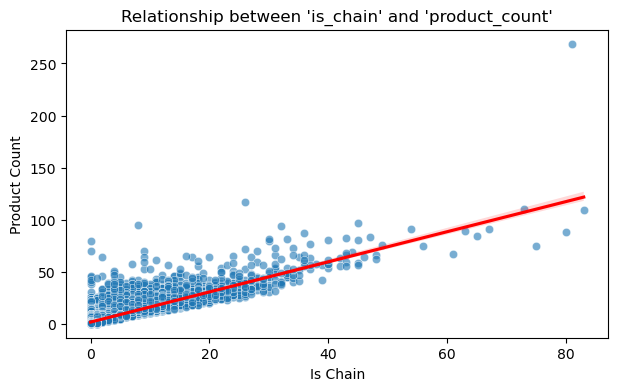

In [15]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='is_chain', y='product_count', alpha=0.6)
sns.regplot(data=df, x='is_chain', y='product_count', scatter=False, color='red')  # Regression line
plt.title("Relationship between 'is_chain' and 'product_count'")
plt.xlabel("Is Chain")
plt.ylabel("Product Count")
plt.show()

In [16]:
if ((df['is_chain'] <= df['product_count']) | (df['product_count'] == 0)).all(): #df['product_count'] == 0 excludes errors (see 3.4.3.)
    print("is_chain is always smaller than product_count for all rows.")
else:
    print("Rows where is_chain is not always smaller than product_count and product_count is not 0:")
    display(df[(df['is_chain'] > df['product_count']) & (df['product_count'] != 0)])

is_chain is always smaller than product_count for all rows.


This way, we can conclude that the column is_chain is actually representing the total products that were ordered from a chain.
We choose not to turn this column into a binary since we think that the column as it is gives more relevant information.
We change `is_chain` to `chained` to match the contents - Indicates how many products order by the customer were chained.

In [17]:
# Rename the column 'is_chain' to 'chained'
df.rename(columns={'is_chain': 'chained'}, inplace=True)

<hr>
<a class="anchor" id="strangevalues">
    
## 3.4. Strange Values
</a>
Some columns in the descriptive analysis have shown to have values that can be considered as strange without any further analysis. This way, we will explore each of them more deeply to understand where they come from and whether they are indeed strange or can be intrepreted.

### 3.4.1. Strange Values - Region

In [18]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

The `-` character in the `customer_region` column likely represents unknown values, since we don't have any information about what these might be we will substitute them by the mode because it represents the most frequently occurring value in the column, making it a reasonable estimate for missing data.

In [19]:
# Calculate the mode of the customer_region column
mode_value = df['customer_region'].mode()[0]

# Replace '-' with the mode value
df.loc[df['customer_region'] == '-', 'customer_region'] = mode_value

# Verify the change
print(df['customer_region'].unique())


['2360' '8670' '4660' '2440' '4140' '2490' '8370' '8550']


Even though the column is categorical, transforming it into numerical one, will avoid needing to use one hot encoder later

In [20]:
df['customer_region'] = df['customer_region'].astype('Int64')

### 3.4.2. Strange Values - Promotion

In [21]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

The `-` in this column seem ambiguous initially, but it will be interpreted as indicating no promotion in future visualizations. This assumption is supported by the structure of the dataset, which shows that certain sorts of promotions are clearly represented by other values like DELIVERY, DISCOUNT, and FREEBIE.

In [22]:
# Replace '-' with 'NO PROMO' in the last_promo column
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

# Print unique values to confirm the change
print(df['last_promo'].unique())

['DELIVERY' 'DISCOUNT' 'NO PROMO' 'FREEBIE']


### 3.4.3. Strange Values - product_count & vendor_count
As we saw in the previous descriptive statistics, the columns product_count & vendor_count have a minimum value of 0 orders, this is odd as this means that there were no products ordered by those customers. 

In [23]:
print(f"Number of rows where both product_count and vendor_count are 0: {df[(df['product_count'] == 0) & (df['vendor_count'] == 0)].shape[0]}")
print(f"Number of rows where vendor_count is 0: {df[df['vendor_count'] == 0].shape[0]}")
print(f"Number of rows where product_count is 0: {df[df['product_count'] == 0].shape[0]}")
# Print unique customer regions with zero product and vendor counts
unique_errors_region = df[(df['product_count'] == 0) & (df['vendor_count'] == 0)]['customer_region'].unique()
print('Errors were in region(s):', unique_errors_region)


df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
unique_values_array = df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'DOW_all', 'customer_region']].drop_duplicates().values

print('When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of', unique_values_array)
# df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'product_count', 'DOW_all']] # to visualize this better

Number of rows where both product_count and vendor_count are 0: 138
Number of rows where vendor_count is 0: 138
Number of rows where product_count is 0: 156
Errors were in region(s): <IntegerArray>
[8670]
Length: 1, dtype: Int64
When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of [[1 1 4660]]


We can see that there are 138 orders that didn't have any product order nor vendor. These are most likely an error in the region 8670 since they imply that customers placed no orders.    
We can also see that there are rows where product_count is 0 and vendor_count is not. When looking through DOW_all with 1 order for each of these rows, we can conclude that, for these rows, the procut_count is of at least 1. 

In [24]:
df.loc[(df['product_count'] == 0) & (df['vendor_count'] != 0)]


,customer_id,customer_region,customer_age,vendor_count,product_count,chained,first_order,last_order,last_promo,payment_method,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all
6180,aed85972bb,4660,27,1,0,0,6,6,DISCOUNT,CARD,...,0,0,0,1,0,0,0,0,0,1
6183,b2ebe2e6e0,4660,43,1,0,0,6,6,NO PROMO,CARD,...,0,0,0,0,0,0,0,0,0,1
10995,6f723d9894,4660,36,1,0,0,13,13,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,1
14137,9d74f2ac81,4660,27,1,0,0,19,19,DELIVERY,CARD,...,0,0,1,0,0,0,0,0,0,1
14611,27b7eed8fa,4660,35,1,0,0,20,20,DISCOUNT,DIGI,...,1,0,0,0,0,0,0,0,0,1
14639,6c9e68b2e7,4660,22,1,0,0,20,20,DISCOUNT,DIGI,...,0,1,0,0,0,0,0,0,0,1
16099,c0b330c4df,4660,27,1,0,0,23,23,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
17200,68c4faeecb,4660,25,1,0,0,26,26,FREEBIE,DIGI,...,0,0,0,0,0,0,1,0,0,1
19972,48e8abd5bf,4660,34,1,0,0,33,33,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,1
23095,7bfc19bd89,4660,21,1,0,0,42,42,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Filter the rows where DOW_all equals 1
filtered_df = df[df['DOW_all'] == 1]

# Calculate the median of product_count for these rows
median_product_count = filtered_df['product_count'].median()

In [26]:
# Remove rows where both product_count and vendor_count are 0
df = df.drop(df[df['vendor_count'] == 0].index) # erasing 138 rows

# Substitute product_count = 0 with 1 when vendor_count is not zero by the median of product_count when DOW_all is 1
df.loc[(df['product_count'] == 0) & (df['vendor_count'] != 0), 'product_count'] = median_product_count

# Verify the changes
print(f"Number of rows where both product_count and vendor_count are 0: {df[(df['product_count'] == 0) & (df['vendor_count'] == 0)].shape[0]}")
print(f"Number of rows where vendor_count is 0: {df[df['vendor_count'] == 0].shape[0]}")
print(f"Number of rows where product_count is 0: {df[df['product_count'] == 0].shape[0]}")


Number of rows where both product_count and vendor_count are 0: 0
Number of rows where vendor_count is 0: 0
Number of rows where product_count is 0: 0


<hr>
<a class="anchor" id="missingvalues">
    
## 3.5. Missing Values
</a>

As we previously saw, not all columns have 31'888 rows non-null, which means some of them have missing values. 
In the next steps, we can see with more details which of them have missing values and its amount.

In [27]:
missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_values.columns = ['Total', 'Percentage']
missing_values.sort_values(by=['Total', 'Percentage'], ascending=False, inplace=True)
missing_values.T
#df.isna().sum() # To see how many missing values are in each column

,HR_0,customer_age,first_order,customer_id,customer_region,vendor_count,product_count,chained,last_order,last_promo,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all
Total,1164.000000,727.000000,106.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,3.667643,2.290702,0.333995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.5.1. Missing values - HR_0

In [28]:
df['HR_0'].unique()

array([ 0., nan])

We observe that the values in the specified column are either zero or missing, suggesting missing values might represent zeros or an assignment error.
Since the columns are in the same unit, we can sum the totals of the DOW_s columns and compare them with the hours columns. We expect these totals to match. If they don't, we'll need to explore whether discrepancies relate to missing values in `HR_0`.


In [29]:
# Setting 2 new lists that amount the orders in the week and in the hours
# df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1) defined above
df['HR_all'] = df.loc[:, 'HR_0':'HR_23'].sum(axis=1)

# Counting how many times DOW_all does not equal HR_all
(df['DOW_all'] != df['HR_all']).sum()

1164

We can see that there are as many rows where the sum of all days of the week is different from the sum of all hours as there are missing values in HR_0. Therefore we will see if they are the rows or if this number is just a coincidence.

In [30]:
# To check if DOW_all is not equal to HR_all
df['diff_check'] = df['DOW_all'] != df['HR_all']

# To check if all rows with differences have HR_0 missing
outcome = (df['diff_check'] == df['HR_0'].isna()).all()

if outcome == True:
    print('The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0')
else:
    print('No conclusion to be made' )

The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0


As the rows are exactly the same, we can conclude that the lack of values in HR_0 was an error and that its real value actually corresponds to the difference between the two summed columns. 
This way, we will substitute the missing values in HR_0 with the difference between the totals to guarantee more realistic visualizations.

In [31]:
df['HR_0'] = df['HR_0'].fillna(df['DOW_all'] - df['HR_all']) # Replace missing values in HR_0 with the calculated difference

df['HR_0'].isna().sum() # To confirm if the missing values were substituted

0

We drop this columns since they were only used for this purpose and won't be necessary anymore.

In [32]:
df.drop(columns=['diff_check', 'HR_all'], inplace=True)

### 3.5.2. Missing values - first_order

There are 106 missing values in the column 'first_order'. To understand better this column, we will see if, when this value is NaN, there is any pattern in other variables. 
For example if any of them has the value 0.

In [33]:
df_filtered = df[df['first_order'].isna()]
statistics = df_filtered.describe().T

zero_range_columns = statistics[statistics['max'] == 0]
print("Columns where max is equal to 0:", zero_range_columns.index.tolist())

Columns where max is equal to 0: ['last_order', 'CUI_Cafe', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'HR_22', 'HR_23']


In [34]:
# df[df['first_order'].isna()]['last_order'].unique() was used to experiment if there are patterns between the missing values of 'first_order' and other columns
# Checking if this corresponds exactly to 'last_order' being 0
outcome = ((df['first_order'].isna()) == (df['last_order'] == 0)).all()

if outcome:
    print("The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.")
else:
    print("There is no exact correspondence between rows where 'first_order' is NaN and where 'last_order' is 0.")

The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.


When `last_order` is 0, it means that the first and only time the customer ordered was on the day the company started its activity. From this, we conclude that all rows with a missing value in the `first_order` column correspond exactly to rows where `last_order` is 0. This indicates that these customers' first and last order was on the first day of activity. Therefore, all missing values in `first_order` actually correspond to 0.

In [35]:
df['first_order'] = df['first_order'].fillna(0)
df['first_order'].isna().sum() # To confirm if the missing values were substituted

0

### 3.5.3. Missing values - customer_age


In [36]:
# # Filter the DataFrame for rows where 'first_order' is NaN
# df_filtered = df[df['customer_age'].isna()]
# # To see if there is any odd pattern
# df_filtered.describe().T

We could not identify a pattern in the missing age values, suggesting they are missing completely at random, in contrast to the previous ones. This way, we chose to substitute the missing values of customer_age by the 5 nearest neighbours.    
The result ends up being the same as the mean but we round it to the unity to that is more real.

In [37]:
knn_imputer = KNNImputer(n_neighbors=5)

original_customer_age = df['customer_age'].copy()

print('Missing values of age are originally', original_customer_age.isnull().sum())

#Imputation
df['customer_age'] = knn_imputer.fit_transform(df[['customer_age']])

# Round the imputed values to the nearest integer because age should be integer
df['customer_age'] = df['customer_age'].round().astype(int)

# Identify which values were imputed (NaNs that were replaced)
replaced_values = df.loc[original_customer_age.isnull(), 'customer_age']

# Display the unique imputed values
print("The values that KNN calculated are:", replaced_values.unique())

# Print the number of missing values after the imputation
print('Missing values of age after the KNN imputation are', df['customer_age'].isnull().sum())


Missing values of age are originally 727
The values that KNN calculated are: [28]
Missing values of age after the KNN imputation are 0


<hr>
<a class="anchor" id="featureengineering">
    
## 3.6. Feature Engineering
    
</a>

- Total orders
The feature DOW_all that was created in the previous section for auxilitary computations, represents the total amount of orders made by each customer. 

In [38]:
df['total_orders'] = df['DOW_all']

- Number of the days as a customer

In [39]:
df['days_as_customer'] = df['last_order'] - df['first_order']

- Aggregation of Orders by Time of Day

In [40]:
# df['hours_night'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
# df['hours_breakfast'] = df[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
# df['hours_lunch'] = df[['HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
# df['hours_afternoon'] = df[['HR_15', 'HR_16', 'HR_17', 'HR_18']].sum(axis=1)
# df['hours_dinner'] = df[['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1) 
# hours_aggregated = ['hours_night', 'hours_breakfast', 'hours_lunch', 'hours_afternoon', 'hours_dinner']

# time_of_day_replacement = {
#     'hours_night': 'Night',
#     'hours_breakfast': 'Breakfast',
#     'hours_lunch': 'Lunch',
#     'hours_afternoon': 'Afternoon',
#     'hours_dinner': 'Dinner'}

- Total Expenditure

In [41]:
df['monetary'] = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=1)

- Total Expenditure by Cuisine Grouping

In [42]:
# # Summing up various cuisine categories according to what we think can be aggregated
# df['asian_cuisines'] = df[["CUI_Asian", "CUI_Chinese", "CUI_Indian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_Thai"]].sum(axis=1)
# df['american_cuisines'] = df[["CUI_American", "CUI_Chicken Dishes", "CUI_Street Food / Snacks"]].sum(axis=1)
# df['cafe_desserts'] = df[["CUI_Desserts", "CUI_Cafe"]].sum(axis=1)

# # List of aggregated cuisines
# cuisines_aggregated = ['asian_cuisines', 'american_cuisines', 'CUI_Italian', 'cafe_desserts', 'CUI_Healthy', 'CUI_Beverages', 'CUI_OTHER']

# # Replacement mapping for cuisine names
# cuisine_replacement = {
#     'asian_cuisines': 'Asian Cuisines',
#     'american_cuisines': 'American Cuisines',
#     'CUI_Italian': 'Italian',
#     'CUI_Beverages': 'Beverages',
#     'CUI_Healthy': 'Healthy',
#     'CUI_Street Food / Snacks': 'Street Food / Snacks',
#     'cafe_desserts': 'Cafe Desserts',
#     'CUI_OTHER': 'Other'}

- Repeat customers

In [43]:
df['repeat_customers'] = ((df['last_order'] - df['first_order']) > 0).astype(int)

- Days of the week

In [44]:
df['DOW_weekends'] = df[['DOW_0', 'DOW_6']].sum(axis=1)
df['DOW_daysweek'] = df[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].sum(axis=1)

-  Cuisine diversification 

In [91]:
cui_all = [col for col in df if 'CUI_' in col]
df['diversification'] = (df[cui_all] !=0).sum(axis=1)

- Products & money per order

In [92]:
df['products_per_order'] = df['product_count']/ df['total_orders']
df['money_per_order'] = df['monetary']/df['total_orders']

<hr>
<a class="anchor" id="outliers">
    
## 3.6. Outliers
</a>

In [45]:
numeric_columns_complete = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_complete

Index(['customer_region', 'vendor_count', 'product_count', 'chained',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_all', 'total_orders',
       'days_as_customer', 'monetary', 'DOW_weekends', 'DOW_daysweek'],
      dtype='object')

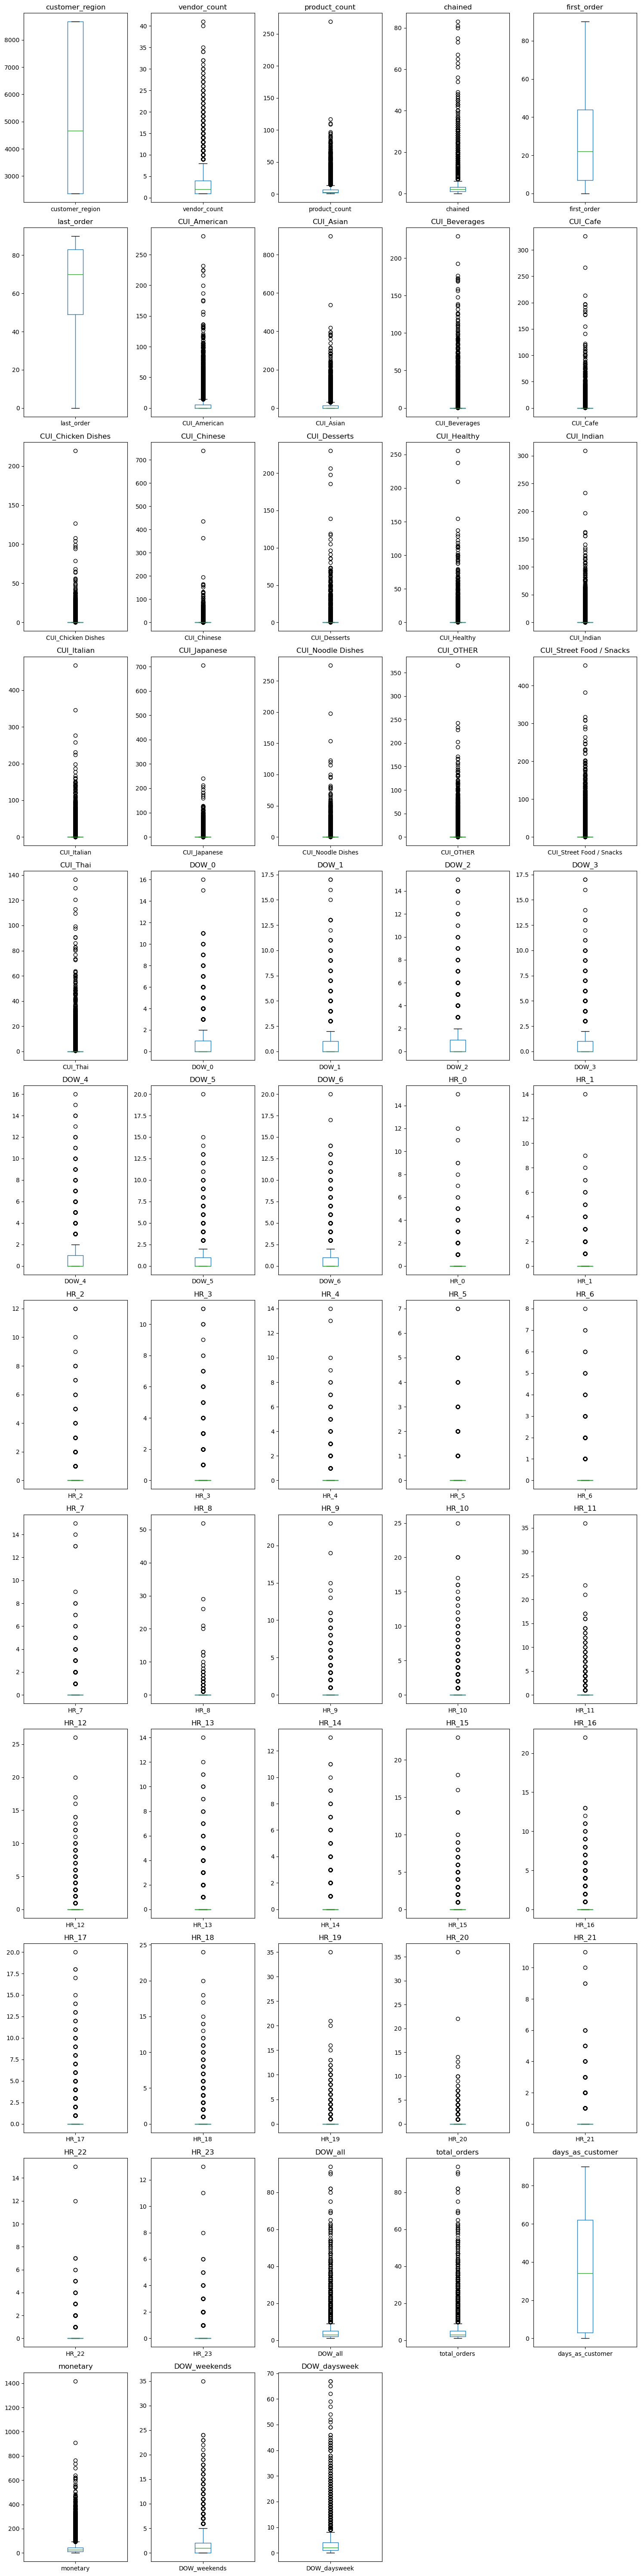

In [46]:
plots_per_row = 5
num_columns = len(numeric_columns_complete)
num_rows = math.ceil(num_columns / plots_per_row)

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows), squeeze=False)
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_columns_complete):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(False)

# Hide any unused axes
for j in range(len(numeric_columns_complete), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The following variables will not be analysed further, in this regard since:   
`customer_age`: No removal of the outliers as people with 80 years (maximum of the dataset) can order as well.   
`first_order`: There are no outliers in this as the dataset has a duration of 90 days.    
`last_order`: There are no outliers in this as the dataset has a duration of 90 days.

Variables such as `vendor_count`, `product_count`, `chained`, `DOW_all` and `cuisine_all` have notourious outliers and therefore we will analyse if the lines are the same to understand what we should do about them.

#### vendor_count

In [48]:
out_vend = df.sort_values('vendor_count', ascending=False)[['vendor_count', 'product_count', 'chained', 'total_orders', 'monetary']].head(4)
#out_vend

#### product_count

In [50]:
out_prod = df.sort_values('product_count', ascending=False)[['vendor_count', 'product_count', 'chained', 'total_orders', 'monetary']].head(4)
#out_prod

#### chained

In [51]:
out_chain = df.sort_values('chained', ascending=False)[['vendor_count', 'product_count', 'chained', 'total_orders', 'monetary']].head(4)
#out_chain

#### DOW_all

In [56]:
out_dow = df.sort_values('total_orders', ascending=False)[['vendor_count', 'product_count', 'chained', 'total_orders', 'monetary']].head(7)
#out_dow

#### cuisine_all

In [55]:
out_cui = df.sort_values('monetary', ascending=False)[['vendor_count', 'product_count', 'chained', 'total_orders', 'monetary']].head()
#out_cui

In [57]:
# Convert the indices into Series and then concatenate them
all_indexes = pd.concat([pd.Series(out_vend.index), pd.Series(out_prod.index), pd.Series(out_dow.index), pd.Series(out_cui.index), pd.Series(out_chain.index)])

# Count the occurrences of each index
index_counts = all_indexes.value_counts()

# Display the indices that appear more than once
index_counts[index_counts > 1]

1270    5
1263    3
2435    3
1268    2
7012    2
3368    2
Name: count, dtype: int64

#### Removal
As the outlier is an outlier in more than 4 of the different columns previously analysed we will consider it an atypical value.

In [58]:
df = df.drop(1270, axis=0)

With DBSCAN

#Podemos  ver se queremos meter com pca ou nao e depois passamos para aqui a info que estava em baixo e metiamos o conceito em prática

In [60]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# List of features to analyze
features = ['vendor_count', 'product_count', 'chained', 'first_order', 'last_order', 
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_2', 
    'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 
    'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_orders', 'monetary']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features].values)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=10) # reducing the dataset to 10dimensions
X_reduced = pca.fit_transform(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=3)  # Adjust min_samples as needed
labels = dbscan.fit_predict(X_reduced)

# Identify and remove outliers
outlier_indices = np.where(labels == -1)[0]
df_filtered = df.drop(index=df.iloc[outlier_indices].index)

# Output results
print(f"Number of rows after outlier removal: {df_filtered.shape[0]}")
print(f"Total number of outliers removed: {len(outlier_indices)}")


Number of rows after outlier removal: 30689
Total number of outliers removed: 1047


<hr>
<a class="anchor" id="datavisualizations">
    
# 5. Scaling Methods
    
</a>

### Scaling


In [61]:
# scaler = MinMaxScaler()

# columns_to_scale = df_ohc.select_dtypes(include=['float64', 'int64', 'Int64']).columns

# boolean_columns = df_ohc.select_dtypes(include=['boolean']).columns

# df_normal_spenders_scaled = df_ohc[df_ohc['spending_type'] == 'normal'].copy()  # Example filter for normal spenders
# df_high_spenders_scaled = df_ohc[df_ohc['spending_type'] == 'high'].copy()  # Example filter for high spenders

# df_normal_spenders_scaled[columns_to_scale] = scaler.fit_transform(df_normal_spenders_scaled[columns_to_scale])

# df_high_spenders_scaled[columns_to_scale] = scaler.transform(df_high_spenders_scaled[columns_to_scale])

We use StandardScaler because the dataset has some outliers and this deals better with the outliers.

In [62]:
scaler = StandardScaler()

df_scaled = df_filtered.copy()
numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64', 'Int64']).columns
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

<hr>
<a class="anchor" id="encoder">
    
## 6. Encoder
</a>

#### Encoding categorical variables using the One-Hot Encoder

In [63]:
df_scaled.select_dtypes(include=['object', 'category']).columns

Index(['customer_id', 'last_promo', 'payment_method'], dtype='object')

In [64]:
pd.set_option('display.max_columns', None)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

categorical_columns_complete = df_scaled.select_dtypes(include=['object', 'category']).columns
categorical_columns_complete = categorical_columns_complete[categorical_columns_complete != 'customer_id']

encoded_array = one_hot_encoder.fit_transform(df_scaled[categorical_columns_complete])

encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns_complete)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df_scaled.index)

df_ohc = pd.concat([df_scaled.drop(columns=categorical_columns_complete), encoded_df], axis=1)
df_ohc.set_index(df.columns[0], inplace=True)
df_ohc

,customer_region,customer_age,vendor_count,product_count,chained,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all,total_orders,days_as_customer,monetary,repeat_customers,DOW_weekends,DOW_daysweek,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,payment_method_CASH,payment_method_DIGI
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.091549,18,-0.394319,0.033680,-0.526924,-1.205033,-2.673489,-0.442881,-0.472570,-0.285181,-0.148058,-0.242648,-0.230561,-0.183173,-0.186158,4.545809,-0.31507,-0.335688,-0.177007,-0.339194,-0.263324,-0.199391,0.658832,-0.587162,-0.603419,-0.617487,-0.666747,-0.65109,0.397676,-0.168678,-0.172089,-0.189438,-0.237586,-0.240643,-0.228126,-0.209703,-0.2211,-0.266535,-0.343695,-0.404501,-0.427547,-0.400315,-0.382305,-0.371950,-0.398291,-0.424320,-0.440268,2.268294,-0.333754,-0.26896,-0.208771,-0.168589,-0.163183,-0.542883,-0.542883,-1.148202,-0.140840,1,0.684583,-1.062455,0.0,0.0,0.0,0.0,1.0
5d272b9dcb,1.330248,17,-0.394319,-0.652193,-0.160049,-1.205033,-2.673489,0.855979,-0.128751,-0.285181,-0.148058,-0.242648,-0.230561,-0.183173,-0.186158,-0.237749,-0.31507,-0.335688,-0.177007,-0.339194,-0.263324,-0.199391,0.658832,-0.587162,-0.603419,-0.617487,-0.666747,-0.65109,0.397676,-0.168678,-0.172089,-0.189438,-0.237586,-0.240643,-0.228126,-0.209703,-0.2211,-0.266535,-0.343695,1.050291,0.873623,-0.400315,-0.382305,-0.371950,-0.398291,-0.424320,-0.440268,-0.403632,-0.333754,-0.26896,-0.208771,-0.168589,-0.163183,-0.542883,-0.542883,-1.148202,-0.446267,1,0.684583,-1.062455,1.0,0.0,0.0,0.0,1.0
f6d1b2ba63,-0.208802,38,-0.856834,-0.652193,-0.160049,-1.205033,-2.673489,0.489219,-0.472570,-0.285181,-0.148058,-0.242648,-0.230561,-0.183173,-0.186158,-0.237749,-0.31507,-0.335688,-0.177007,-0.339194,-0.263324,-0.199391,0.658832,-0.587162,-0.603419,-0.617487,-0.666747,-0.65109,0.397676,-0.168678,-0.172089,-0.189438,-0.237586,-0.240643,-0.228126,-0.209703,-0.2211,-0.266535,1.416596,-0.404501,0.873623,-0.400315,-0.382305,-0.371950,-0.398291,-0.424320,-0.440268,-0.403632,-0.333754,-0.26896,-0.208771,-0.168589,-0.163183,-0.542883,-0.542883,-1.148202,-0.762432,1,0.684583,-1.062455,1.0,0.0,0.0,1.0,0.0
180c632ed8,-0.208802,28,-0.394319,-0.423568,-0.526924,-1.205033,-2.630424,-0.442881,0.264570,-0.285181,-0.148058,-0.242648,-0.230561,-0.183173,-0.186158,2.720504,-0.31507,-0.335688,-0.177007,-0.339194,-0.263324,-0.199391,-0.589094,0.632757,-0.603419,-0.617487,-0.666747,-0.65109,0.397676,-0.168678,-0.172089,-0.189438,-0.237586,-0.240643,-0.228126,-0.209703,-0.2211,-0.266535,-0.343695,-0.404501,0.873623,-0.400315,-0.382305,1.607718,-0.398291,-0.424320,-0.440268,-0.403632,-0.333754,-0.26896,-0.208771,-0.168589,-0.163183,-0.542883,-0.542883,-1.113465,-0.056192,1,-0.068839,-0.667498,0.0,0.0,0.0,0.0,1.0
4eb37a6705,-0.208802,20,-0.394319,0.033680,-0.893799,-1.205033,-2.630424,1.033281,1.726476,-0.285181,-0.148058,-0.242648,-0.230561,-0.183173,-0.186158,-0.237749,-0.31507,-0.335688,-0.177007,-0.339194,-0.263324,-0.199391,-0.589094,0.632757,-0.603419,-0.617487,-0.666747,-0.65109,0.397676,-0.168678,-0.172089,-0.189438,-0.237586,-0.240643,-0.228126,-0.209703,-0.2211,2.318701,1.416596,-0.404501,-0.427547,-0.400315,-0.382305,-0.371950,-0.398291,-0.424320,-0.440268,-0.403632,-0.333754,-0.26896,-0.208771,-0.168589,-0.163183,-0.542883,-0.542883,-1.113465,0.698058,1,-0.068839,-0.667498,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

<hr>
<a class="anchor" id="datavisualizations">
    
# 7. Feature Selection
    
</a>

Columns not used in segmentations and reasons:
1. Categorical columns: Dropping the categorical columns as they would complicate the clusterings as they dont provide a real distance value. Furthermore:
- The last promotion might not always be the reason why a certain customer buys therefore we can't assume that the promotions might be related to the behavior of the customer.
- payment method may not directly correlate with customer behavior.
- regions can be intrepreted after doing the clusters

2. Age columns: It's not included in the clusters because they would all have a very similar mean.

3. Days of the week: Don't have a lot of variability for each day, which is confirmed by the correlation analysis, since the variance across the days is minimal. Given that these features do not provide significant differentiation, their inclusion in the clustering process could add unnecessary noise and complexity, therefore we will only consider DOW_all that aggregates all od them. By removing these columns, we aim to simplify the dataset and focus on features that contribute more meaningfully to cluster formation.

4. Hours: Due to the same reason as previously mentioned, we will drop these columns
5. Highly correlated features: because ofe redundacyt. This way, by observing and understanding them we decide tonot usep vendor_count as it doesn't really give us any information about customer behavior but more about the store
    repeat_customers is erased because if the days_as_customers is 0 they are not repeated and if its more than 0 they are therefore these variables are redudan. we keep the one with ore information.
    chained is erased because....

In [78]:
df_selection = df_scaled[numeric_columns]

In [80]:
# Variability of the days of the week
# Define the DOW columns (days of the week) and other relevant features
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
other_columns = ['vendor_count', 'product_count', 'chained', 'first_order', 'last_order',
                 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
                 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
                 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

# Create a DataFrame to store correlation results
dow_corr_table = pd.DataFrame(index=other_columns)

# Compute the correlation between each feature in other_columns and the DOW columns
for dow in dow_columns:
    # Correlation of each feature with the current DOW column
    dow_corr_table[dow] = df_selection[other_columns].corrwith(df_selection[dow])

# Calculate the variance across DOW columns (DOW_0 to DOW_6, excluding 'DOW_All')
dow_corr_table['DOW_Variance'] = df_selection[dow_columns[:]].var(axis=1)

# Display the final table showing correlations and variance
print("Correlation and Variance Table for DOW Features:")
dow_corr_table

Correlation and Variance Table for DOW Features:


,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,DOW_Variance
vendor_count,0.472616,0.476127,0.474535,0.475547,0.450576,0.449304,0.454032,NaN
product_count,0.514862,0.530097,0.541504,0.537716,0.522721,0.481121,0.503992,NaN
chained,0.459088,0.457070,0.449181,0.453415,0.436545,0.414948,0.429521,NaN
first_order,-0.233061,-0.224016,-0.230432,-0.215279,-0.202754,-0.205137,-0.252760,NaN
last_order,0.210243,0.218682,0.233083,0.251907,0.257561,0.203921,0.191195,NaN
CUI_American,0.143862,0.149949,0.149257,0.166183,0.178825,0.156779,0.154301,NaN
CUI_Asian,0.149951,0.147882,0.138580,0.122586,0.088124,0.111159,0.101258,NaN
CUI_Beverages,0.075026,0.090537,0.064694,0.064632,0.056424,0.050407,0.038765,NaN
CUI_Cafe,0.081773,0.082418,0.105171,0.087326,0.090788,0.066676,0.088180,NaN
CUI_Chicken Dishes,0.123220,0.123364,0.117814,0.127263,0.114385,0.121788,0.131139,NaN


In [81]:
# Define the hour columns and other features
hour_columns = ['HR_0', 'HR_1', 'HR_2', 
    'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 
    'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
other_columns = ['vendor_count', 'product_count', 'chained', 'first_order', 'last_order',
                 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
                 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
                 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

# Create a DataFrame to store correlations for each hour
hour_corr_table = pd.DataFrame(index=other_columns)

# Calculate the correlation between each feature and the hourly columns
for hour in hour_columns:
    hour_corr_table[hour] = df_selection[other_columns].corrwith(df_selection[hour])

# Calculate the variance across all hours (HR_0 to HR_23)
hour_corr_table['HR_Variance'] = df_selection[hour_columns].var(axis=1)

# Display the final table with correlations and variances
print("Table of correlation and variance for hours:")
hour_corr_table


Table of correlation and variance for hours:


,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_Variance
vendor_count,0.090275,0.092764,0.094002,0.106409,0.112175,0.113485,0.101669,0.136785,0.200286,0.245517,0.309150,0.366332,0.379392,0.316138,0.259516,0.221831,0.247420,0.306990,0.360810,0.327624,0.276328,0.178525,0.132352,0.107319,NaN
product_count,0.076325,0.080850,0.080763,0.084259,0.088536,0.083503,0.072125,0.110981,0.198758,0.282727,0.350733,0.400476,0.399117,0.346919,0.318267,0.328795,0.354568,0.398090,0.409128,0.347533,0.255054,0.164603,0.106648,0.092213,NaN
chained,0.048669,0.033080,0.014974,0.002782,0.012735,0.018946,0.025303,0.070494,0.152973,0.201935,0.253525,0.381329,0.411682,0.336245,0.256272,0.224839,0.238892,0.334192,0.401399,0.392470,0.317555,0.201452,0.114125,0.078048,NaN
first_order,-0.044790,-0.045447,-0.043105,-0.032423,-0.038331,-0.048084,-0.042446,-0.052460,-0.072902,-0.101543,-0.146518,-0.166670,-0.174041,-0.155534,-0.125689,-0.126459,-0.155559,-0.177449,-0.176535,-0.151934,-0.123714,-0.085922,-0.052364,-0.044714,NaN
last_order,0.034848,0.039920,0.048928,0.067194,0.066063,0.064145,0.055560,0.074470,0.104080,0.142920,0.160480,0.156427,0.145642,0.132511,0.135760,0.170955,0.168658,0.163643,0.141063,0.111810,0.083649,0.067174,0.053956,0.042861,NaN
CUI_American,0.067268,0.074668,0.089037,0.087781,0.072883,0.064373,0.058686,0.045346,0.064883,0.113175,0.129340,0.075257,0.053855,0.067627,0.094822,0.156099,0.173161,0.135857,0.081060,0.024741,0.004575,-0.002188,0.007952,0.027527,NaN
CUI_Asian,0.115638,0.183864,0.234977,0.296256,0.295002,0.239756,0.164928,0.132892,0.132830,0.187914,0.196392,0.091530,0.021060,0.007875,0.013241,-0.001099,-0.014839,-0.044020,-0.066238,-0.082741,-0.075584,-0.056841,-0.004142,0.056915,NaN
CUI_Beverages,0.023234,0.041013,0.058851,0.108661,0.132814,0.167529,0.156309,0.136257,0.104338,0.055866,0.050397,0.057362,0.057809,0.059953,0.018491,-0.031917,-0.065671,-0.056330,-0.026882,0.000695,0.013917,0.017007,-0.002748,0.017920,NaN
CUI_Cafe,-0.014145,-0.019769,-0.023942,-0.033401,-0.027703,-0.011985,0.031206,0.087770,0.138030,0.129449,0.125562,0.075347,0.045848,0.050702,0.052494,0.054470,0.085255,0.071708,0.034938,0.002988,-0.001748,-0.006494,-0.009869,-0.014590,NaN
CUI_Chicken Dishes,0.007173,-0.016549,-0.030370,-0.051090,-0.052904,-0.049974,-0.043958,-0.022206,0.004702,-0.001480,0.020035,0.120082,0.150572,0.114253,0.081632,0.040884,0.040452,0.111759,0.181002,0.172873,0.153805,0.105912,0.081220,0.041606,NaN


In [82]:
# Calculate the correlation matrix
correlations = df_selection.corr().round(2)

# Create an empty list to store pairs of features with high correlation
high_corr_pairs = []

# Iterate over the upper triangle of the correlation matrix (excluding diagonal)
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.7:  # Only keep correlations above 0.6
            high_corr_pairs.append([correlations.columns[i], correlations.columns[j], correlations.iloc[i, j]])

# Convert the list of high correlation pairs into a DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Display the table
high_corr_df


,Feature 1,Feature 2,Correlation
0,product_count,vendor_count,0.84
1,chained,vendor_count,0.75
2,chained,product_count,0.77
3,DOW_all,vendor_count,0.86
4,DOW_all,product_count,0.96
5,DOW_all,chained,0.82
6,total_orders,vendor_count,0.86
7,total_orders,product_count,0.96
8,total_orders,chained,0.82
9,total_orders,DOW_all,1.00


<hr>
<a class="anchor" id="datavisualizations">
    
# 7. PCA
    
</a>

PCA might lead to some intrepretation difficulties. However, it is still an interesting tool to try in terms of clustering our data.
### How much information each principal component contains

In [83]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=8)  # Define the number of components
numeric_columns = df_selection.drop(columns=['customer_region']).select_dtypes(include=['number']).columns
df_pca = pca.fit_transform(df_selection[numeric_columns])

# Explained variance and explained variance ratio
explained_variance = pca.explained_variance_  # Eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_  # Proportion of variance explained by each component
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)  # Cumulative explained variance ratio

# Combine into a DataFrame
pca_results = pd.DataFrame({
    "Eigenvalue": explained_variance,  # Variance explained by each component
    "Difference": np.insert(np.diff(explained_variance), 0, 0),  # Difference between consecutive eigenvalues
    "Proportion": explained_variance_ratio,  # Proportion of variance explained by each component
    "Cumulative": cumulative_explained_variance_ratio  # Cumulative variance explained
}, index=range(1, pca.n_components_ + 1))

# Show the results
pca_results


,Eigenvalue,Difference,Proportion,Cumulative
1,11.574485,0.000000,0.203055,0.203055
2,3.041769,-8.532716,0.053363,0.256417
3,2.061367,-0.980402,0.036163,0.292580
4,1.549370,-0.511997,0.027181,0.319761
5,1.484616,-0.064754,0.026045,0.345806
6,1.261112,-0.223503,0.022124,0.367930
7,1.253526,-0.007587,0.021991,0.389921
8,1.219341,-0.034185,0.021391,0.411313


This means that using principal component analysis in this dataset might not be the best approach.
With the next code we will consider only 4 of them (explaining in total a variance of 35,3%) to see what they represent.
After, we can see clusters of the 2 first principal components. However, as this two only explain 0,286 of the variance within the dataset, they wont be considered for clustering.


### The information that each PC contains
We chose the first 3 without reocurring to Jolliffe, I. T. (2002) rules as we realized that principal components approach was not the best. We chose 3 after the visualization of the previous table.

In [84]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Use 3 principal components
pca_feat = pca.fit_transform(df_selection[numeric_columns])  # Fit and transform on scaled numeric data
pca_feat_names = [f"PC{i+1}" for i in range(pca.n_components_)]  # Generate names for PCs

# Create a DataFrame for PCA features
pca_df = pd.DataFrame(pca_feat, index=df_scaled.index, columns=pca_feat_names)  # Ensure index matches the original data
pca_df

# Calculate loadings
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose the PCA components to align variables with PCs
    index=numeric_columns,  # Row names are original features
    columns=pca_feat_names  # Column names are the PCs
).T
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings.style.map(_color_red_or_green)

,vendor_count,product_count,chained,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all,total_orders,days_as_customer,monetary,DOW_weekends,DOW_daysweek
PC1,0.258355,0.285347,0.241893,-0.132149,0.130903,0.090328,0.071954,0.037454,0.049721,0.070031,0.066332,0.023084,0.038286,0.052215,0.070646,0.066546,0.052586,0.104305,0.029190,0.054210,0.161135,0.161493,0.164297,0.163852,0.157986,0.144006,0.152770,0.021171,0.020838,0.020020,0.020519,0.023421,0.023317,0.021051,0.033481,0.060070,0.086357,0.107679,0.121836,0.123192,0.107468,0.097027,0.100425,0.109499,0.122617,0.124625,0.105702,0.079505,0.052000,0.033609,0.027095,0.291015,0.291015,0.216164,0.204462,0.207467,0.268402
PC2,0.038236,0.026150,-0.090643,0.005240,0.053722,0.079937,0.374522,0.161831,-0.002669,-0.144096,-0.021039,0.142623,0.059270,-0.097858,-0.125400,0.069894,-0.094910,-0.140308,0.207357,-0.092887,0.026361,0.024911,0.020568,-0.004835,-0.036052,-0.024520,-0.044205,0.085426,0.144697,0.193966,0.253945,0.271505,0.254808,0.203274,0.170091,0.133617,0.142780,0.120727,-0.000895,-0.059673,-0.055398,-0.052201,-0.090262,-0.125636,-0.177065,-0.199631,-0.189918,-0.152417,-0.103244,-0.045436,0.023966,-0.012668,-0.012668,0.038948,0.285285,-0.015967,-0.008047
PC3,-0.108510,0.007171,-0.166546,0.054430,0.072313,0.138577,0.006731,-0.150558,0.121129,-0.216130,-0.140906,-0.051894,0.076444,0.112305,0.325336,0.124921,-0.205708,0.091221,0.028359,0.133677,-0.064115,-0.020508,0.015901,0.017830,0.076939,-0.003259,-0.032647,-0.119196,-0.086623,-0.059274,-0.050745,-0.061011,-0.055411,-0.034360,-0.018312,0.028914,0.114121,0.095206,-0.090180,-0.179136,-0.093344,0.071121,0.284428,0.361334,0.206169,-0.043895,-0.206822,-0.260973,-0.213714,-0.161663,-0.145419,-0.001567,-0.001567,0.012785,0.165363,-0.062255,0.030605
PC4,0.010942,-0.011243,0.089542,0.127693,0.039494,-0.155720,-0.117896,0.092517,0.207634,0.033327,0.044820,0.038793,0.175550,-0.065899,-0.190552,0.060532,0.070406,0.081792,-0.040654,-0.029707,-0.073204,0.137855,0.127398,0.110800,0.070017,-0.061681,-0.260240,-0.271395,-0.238756,-0.184622,-0.094627,-0.069092,-0.012410,0.065823,0.094690,0.203442,0.221141,0.210867,0.230673,0.171193,0.050105,-0.085122,-0.147407,-0.134510,-0.059378,-0.008396,-0.009561,-0.067667,-0.140132,-0.180175,-0.242594,0.004535,0.004535,-0.074989,-0.084453,-0.231892,0.127440
PC5,-0.005945,-0.007686,0.020702,-0.138603,-0.173510,-0.045854,-0.039308,0.004586,0.103106,-0.005401,0.000515,0.061493,0.010121,-0.059937,-0.048550,0.060316,0.012220,-0.006771,0.058057,-0.003685,0.235655,-0.157347,-0.167811,-0.183425,-0.223276,-0.042274,0.452207,-0.144240,-0.130300,-0.101972,-0.112373,-0.018954,0.007012,0.038435,0.058531,0.069875,0.059748,0.090936,0.118503,0.109284,0.071996,0.056405,-0.038804,-0.040350,-0.022220,-0.000919,-0.036983,-0.114132,-0.178105,-0.184713,-0.174449,-0.012814,-0.012814,-0.023982,-0.003375,0.468424,-0.262163


As the values are very similar within each PC, they become very hard to intrepret as well. Reforcing our idea of not considering this analysis for the future.

<a class="anchor" id="overview">
    
## 8. Creation of Segmentation
</a>

Before proceeding to clusters models, it is important to divide the dataset into different groups. Looking to our data, we found 2 groups: one for behaviour and one for the value.

In [85]:
df_selection.columns

Index(['customer_region', 'vendor_count', 'product_count', 'chained',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_all', 'total_orders',
       'days_as_customer', 'monetary', 'DOW_weekends', 'DOW_daysweek'],
      dtype='object')

- Behaviour-based segmentation
focuses on purchasing habits

In [87]:
# Behaviour-based segmentation which focuses on purchasing habits
behaviour = ['monetary', 'product_count', 'days_as_customer','DOW_weekends', 'DOW_daysweek', 'diversification']
df_behaviour = df_scaled[behaviour]


- Preferences-based segmentation     
Grouping by the customers' preferences

In [88]:
preferences = [ 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
            'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

df_preferences = df_scaled[preferences]


Ideas:
- Looking through the days of the week to see if there are days with less orders: Something like montaditos, wednesday and sunday with promos to have more people there.
- The same for hours: something like happy hour 

In [89]:
import pickle
pickle.dump(df_behaviour, open("df_behaviour.pkl", 'wb'))
pickle.dump(df_preferences, open("df_preferences.pkl", 'wb'))


### Function for plotting R2 for various hierarchical methods

In [ ]:
def get_ss(df, feats): # Calculation of total sum squared
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    return ss 

# ------------------------------------------------------------------
def get_ssb(df, feats, label_col): # sum of squares between groups (SSB)
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )
    ssb = np.sum(ssb_i)

# ------------------------------------------------------------------
def get_ssw(df, feats, label_col): # sum of squares within groups (SSW)
    feats_label = feats+[label_col]
    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), include_groups=False)
    return df_k.sum()

# ------------------------------------------------------------------
def get_r2(df, feats, label_col): #  R-squared value (measures the proportion of variance explained by the grouping or clustering).
    sst = get_ss(df, feats)                 
    ssw = get_ssw(df, feats, label_col)     
    ssb = sst - ssw              
    return (ssb/sst)

# ------------------------------------------------------------------
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"): # R² for different numbers of clusters using hierarchical clustering
    
    r2 = []  
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) 
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        r2.append(get_r2(df_concat, feats, 'labels'))
        
    return np.array(r2)

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette(df, labels):
    return silhouette_score(df, labels, metric='euclidean')

<a class="anchor" id="hierarc_value">

### 8.1.1 Hierarchical Clustering
</a>

Hierarchical clustering is used to group similar data points into clusters based on similarity. It forms a hierarchical structure known as a dendrogram where we can visualize how clusters are combined or separated at each step. 

We start by define the best linkage method and plot the dendogram to choose the optimal number of clusters. To help decide the optimal number of clusters, we compared the mean values of the variables and used the silhouette score.

### Defining the best linkage method and the best partitioning method (based on the R2)

In [ ]:
# Visualizing the R² scores for each hierarchical method

hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 5

r2_hc = np.vstack([get_r2_hc(df_behaviour, link, max_nclus=max_nclus, min_nclus=1, dist="euclidean") for link in hc_methods])

r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

The highest R^2 in a model implies that this explains better the data. As previously see, the best hierarchical linkage is Ward.

In [ ]:
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hc_labels = hclust.fit_predict(df_behaviour)
hc_labels

In [ ]:
# create the counts of samples under each node (number of points being merged)

from scipy.cluster.hierarchy import dendrogram

counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 120
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### Create a hierarchical clustering algorithm and compare the mean values of the variables

In [ ]:
# n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=3)
hc3_labels = hc3_clust.fit_predict(df_behaviour)

df_concat = pd.concat([df_behaviour, pd.Series(hc3_labels, name='hierarc_labels', index=df_behaviour.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

In [ ]:
# n_clusters = 4

hc4_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc4_labels = hc4_clust.fit_predict(df_behaviour)

df_concat = pd.concat([df_behaviour, pd.Series(hc4_labels, name='hierarc_labels', index=df_behaviour.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

In [ ]:
# n_clusters = 5

hc5_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc5_labels = hc5_clust.fit_predict(df_behaviour)

df_concat = pd.concat([df_behaviour, pd.Series(hc5_labels, name='hierarc_labels', index=df_behaviour.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

#### Silhouette Score

The silhouette score define how-well separated the clusters are, indicating with a higher score the better clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for different n_clusters
for n_clusters in [3, 4, 5]:
    hc_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=n_clusters)
    labels = hc_clust.fit_predict(df_behaviour)
    silhouette_avg = silhouette_score(df_behaviour, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

#### Final Hierarchical clustering solution

In [ ]:
# best solution is 4 clusters

hc4_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc4_labels = hc4_clust.fit_predict(df_behaviour)

df_concat = pd.concat([df_behaviour, pd.Series(hc4_labels, name='hierarc_labels', index=df_behaviour.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

### Refine Clusters with Advanced Techniques

##### 1. CURE (Clustering Using Representatives)

In [ ]:
# import numpy as np
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import pairwise_distances_argmin_min

# def cure_clustering(df_behaviour, n_clusters):
#     # Perform agglomerative clustering
#     hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#     labels = hc.fit_predict(df_behaviour)
    
#     # Now replace clusters with representative points
#     representative_points = []
#     for cluster_id in np.unique(labels):
#         cluster_points = df_behaviour[labels == cluster_id]
#         # Choose representative points as points that are farthest from the centroid
#         centroid = cluster_points.mean(axis=0)
#         distances = np.linalg.norm(cluster_points - centroid, axis=1)
#         farthest_points = cluster_points[np.argsort(distances)[-3:]]  # Take the 3 farthest points
#         representative_points.append(farthest_points)
    
#     return representative_points, labels

# cure_labels, cure_representatives = cure_clustering(df_behaviour, n_clusters=4)

##### 2. Chameleon

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def chameleon_clustering(df_behaviour, n_clusters, refinement_iterations=5):
    # Perform initial agglomerative clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    initial_labels = hc.fit_predict(df_behaviour)
    
    best_labels = initial_labels
    best_score = silhouette_score(df_behaviour, initial_labels)
    
    # Refine clusters iteratively
    for _ in range(refinement_iterations):
        hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        refined_labels = hc.fit_predict(df_behaviour)
        
        score = silhouette_score(df_behaviour, refined_labels)
        if score > best_score:
            best_score = score
            best_labels = refined_labels
    
    return best_labels

chameleon_clustering(df_behaviour, n_clusters=4, refinement_iterations=5)

##### 3. BIRCH

In [ ]:
from sklearn.cluster import Birch

def birch_clustering(df_behaviour, n_clusters):
    birch = Birch(n_clusters=n_clusters)
    birch_labels = birch.fit_predict(df_behaviour)
    return birch_labels

birch_clustering(df_behaviour, n_clusters=4)

To compare the clustering methods, we will compute metrics () for each one. 

The method with the highest Silhouette Score, lowest inertia, and highest R² value will be considered the best for this dataset.

In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette_cure = silhouette_score(df_behaviour, cure_labels)
# silhouette_chameleon = silhouette_score(df_behaviour, chameleon_labels)
# silhouette_birch = silhouette_score(df_behaviour, birch_labels)

<a class="anchor" id="kmeans_value">

### 8.1.2 K-Means Algorithm
</a>

#### 1. Defining the number of clusters - Inertia

Measure the inertia: sum of squared distances between the data points and the centroids - Sum of Squares within the cluster

In [ ]:
range_clusters = range(1, 11)    # test between 1 and 10 clusters
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

The inertia plot: Plot the results of testing different values of K for K-means

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

The smaller the Sum of Squares within, the better, beacause the smaller the SSw, the closer, the datapoints are to the cluster centroid, which means that the datapoints are similar to each other, which is what we are looking for.

However, there must be a balance with other methods.

Observing the Inertia plot, look for the elbow, from which the number of clusters will be chosen. The elbow could be either 2 clusters, or 4 clusters.

R^2

In [ ]:
# same precendure as in hierarchical clustering, mas criei/adaptei uma formula que a stora deu (get_r2_hc) para encaixar no kmeans em vez do hc

In [ ]:
def get_r2_kmeans(df, max_nclus, min_nclus=1, random_state=42):    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        kmeans = KMeans(n_clusters=i, random_state=random_state)
        
        # get cluster labels
        labels = kmeans.fit_predict(df)
        
        # concat df with labels
        df_concat = pd.concat([df, pd.Series(labels, name='labels', index=df.index)], axis=1)
        
        # append the R2 of the given cluster solution
        r2.append(get_r2(df_concat, feats, 'labels'))
        
    return np.array(r2)

In [ ]:
n_initializations = 5  # number of different random initializations to try
max_nclus = 10

r2_kmeans = np.vstack([get_r2_kmeans(df_behaviour, 
                                    max_nclus=max_nclus, 
                                    min_nclus=1, 
                                    random_state=seed) 
                                    for seed in range(n_initializations)])

In [ ]:
# Create DataFrame with all initializations
r2_kmeans_df = pd.DataFrame(
   r2_kmeans.T,
   index=range(1, max_nclus + 1),
   columns=[f'init_{i}' for i in range(n_initializations)]
)

# Add mean and std columns
r2_kmeans_df['mean_R2'] = r2_kmeans_df.mean(axis=1)
r2_kmeans_df['std_R2'] = r2_kmeans_df.std(axis=1)

In [ ]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))

# Plot individual initializations with lower alpha for less visual clutter
for i in range(n_initializations):
    plt.plot(r2_kmeans_df.index, r2_kmeans_df[f'init_{i}'], 
             alpha=0.3, color='gray', linestyle='-', linewidth=1)

# Plot mean with confidence band
sns.lineplot(data=r2_kmeans_df['mean_R2'], linewidth=2.5, marker='o', 
             label='Mean R²', color='blue')

# Add confidence band
plt.fill_between(r2_kmeans_df.index,
                 r2_kmeans_df['mean_R2'] - r2_kmeans_df['std_R2'],
                 r2_kmeans_df['mean_R2'] + r2_kmeans_df['std_R2'],
                 alpha=0.2, color='blue', label='±1 std dev')

# Finalize the plot
plt.legend(title="K-means", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)

fig.suptitle("$R^2$ plot for K-means clustering", fontsize=21)

plt.show()

The elbow seems to exist with 2 or 4 clusters introduced.

Silhouette Coefficient

Measure how well represented each datapoint is by its cluster. Measure of how similar an object is to its own cluster compared to other clusters. The goal is to make sure to assign each datapoint to the correct cluster.

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_behaviour)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_behaviour, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_behaviour, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_behaviour) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

The goal is to have the less negatives possible, because positives mean that each point correctly belongs to the cluster that it was assigned to.

The highest silhouette coeficient was obtained with 2 clusters.

the more clusters introduced, the more negative silhouette coeficients will appear.

The more clusters introduced, the better the R2 score will be.

Find a Balance

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))


#  Why range_clusters[1:] ? 
# Remember we skipped k=1 in the cell above

plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### Number of Clusters Chosen

Inertia: 2 or 4
R2: 2 or 4
Silhouette: 2

number_clusters = 2

### Final K-Means Clustering Solution

In [ ]:
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_behaviour)
km_labels

In [ ]:
df_concat = pd.concat((df_behaviour, pd.Series(km_labels, name='labels', index=df_behaviour.index)), axis=1)
df_concat.groupby('labels').mean()

<a class="anchor" id="overview">
    
## 8.2. Value Segmentation
</a>

In [ ]:
df_scaled.columns

In [ ]:
# Value-based segmentation - which groups customers by their economic value

# preferences = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
#             'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

df_preferences = df_scaled[preferences]
df_preferences

<a class="anchor" id="kmeans_value">

### 8.2.1 Hierarchical Clustering
</a>

### Defining the best linkage method and the best partitioning method (based on the R2)

In [ ]:
# Visualizing the R² scores for each hierarchical method

hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 5

r2_hc = np.vstack([get_r2_hc(df_preferences, link, max_nclus=max_nclus, min_nclus=1, dist="euclidean") for link in hc_methods])

r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

#### With best hierarchical linkage (Ward), plot the dendogram and chose the optimal number of clusters to use

In [ ]:
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hc_labels = hclust.fit_predict(df_preferences)
hc_labels

In [ ]:
# create the counts of samples under each node (number of points being merged)

from scipy.cluster.hierarchy import dendrogram

counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 149
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### Create a hierarchical clustering algorithm and compare the mean values of the variables

In [ ]:
# n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=3)
hc3_labels = hc3_clust.fit_predict(df_preferences)

df_concat = pd.concat([df_preferences, pd.Series(hc3_labels, name='hierarc_labels', index=df_preferences.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

In [ ]:
# n_clusters = 4

hc4_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc4_labels = hc4_clust.fit_predict(df_preferences)

df_concat = pd.concat([df_preferences, pd.Series(hc4_labels, name='hierarc_labels', index=df_preferences.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

In [ ]:
# n_clusters = 5

hc5_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc5_labels = hc5_clust.fit_predict(df_preferences)

df_concat = pd.concat([df_preferences, pd.Series(hc5_labels, name='hierarc_labels', index=df_preferences.index)], axis=1)
df_concat.groupby('hierarc_labels').mean()

#### Silhouette Score

The silhouette score define how-well separated the clusters are, indicating with a higher score the better clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for different n_clusters
for n_clusters in [3, 4, 5]:
    hc_clust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=n_clusters)
    labels = hc_clust.fit_predict(df_preferences)
    silhouette_avg = silhouette_score(df_preferences, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

#### Final Hierarchical clustering solution

## 8.2.2 K-means
preferences

#### 1. Defining the number of clusters - Inertia

Measure the inertia: sum of squared distances between the data points and the centroids - Sum of Squares within the cluster

In [ ]:
range_clusters = range(1, 11)    # test between 1 and 10 clusters
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_preferences)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

The inertia plot: Plot the results of testing different values of K for K-means

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [ ]:
n_initializations = 5  # number of different random initializations to try
max_nclus = 10

r2_kmeans = np.vstack([get_r2_kmeans(df_preferences, 
                                    max_nclus=max_nclus, 
                                    min_nclus=1, 
                                    random_state=seed) 
                                    for seed in range(n_initializations)])

In [ ]:
# Create DataFrame with all initializations
r2_kmeans_df = pd.DataFrame(
   r2_kmeans.T,
   index=range(1, max_nclus + 1),
   columns=[f'init_{i}' for i in range(n_initializations)]
)

# Add mean and std columns
r2_kmeans_df['mean_R2'] = r2_kmeans_df.mean(axis=1)
r2_kmeans_df['std_R2'] = r2_kmeans_df.std(axis=1)

In [ ]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))

# Plot individual initializations with lower alpha for less visual clutter
for i in range(n_initializations):
    plt.plot(r2_kmeans_df.index, r2_kmeans_df[f'init_{i}'], 
             alpha=0.3, color='gray', linestyle='-', linewidth=1)

# Plot mean with confidence band
sns.lineplot(data=r2_kmeans_df['mean_R2'], linewidth=2.5, marker='o', 
             label='Mean R²', color='blue')

# Add confidence band
plt.fill_between(r2_kmeans_df.index,
                 r2_kmeans_df['mean_R2'] - r2_kmeans_df['std_R2'],
                 r2_kmeans_df['mean_R2'] + r2_kmeans_df['std_R2'],
                 alpha=0.2, color='blue', label='±1 std dev')

# Finalize the plot
plt.legend(title="K-means", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)

fig.suptitle("$R^2$ plot for K-means clustering", fontsize=21)

plt.show()

The elbow seems to exist with 2 or 4 clusters introduced.

Silhouette Coefficient

Measure how well represented each datapoint is by its cluster. Measure of how similar an object is to its own cluster compared to other clusters. The goal is to make sure to assign each datapoint to the correct cluster.

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_preferences)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_preferences, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_preferences, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_preferences) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))


#  Why range_clusters[1:] ? 
# Remember we skipped k=1 in the cell above

plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### Final K-Means Clustering Solution

In [ ]:
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_preferences)
km_labels

In [ ]:
df_concat = pd.concat((df_preferences, pd.Series(km_labels, name='labels', index=df_preferences.index)), axis=1)
df_concat.groupby('labels').mean()


### 8.2.3 SOM

#### df_behaviour

In [ ]:
df_behaviour

Visualization with different SOM parameters

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Dataset
M, N = 30, 30
som_data_behaviour = df_behaviour.values  # Your scaled dataset
input_len = som_data_behaviour.shape[1]  # Number of features (4)

# SOM Initialization
som_c = MiniSom(M, N, input_len, sigma=3., learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.random_weights_init(som_data_behaviour)

# Define plotting parameters
fig, axes = plt.subplots(2, 3, figsize=(14, 8), gridspec_kw={'hspace': .15}, constrained_layout=True, dpi=120)
colors_dims = (30, 30)
major_ticks = np.arange(0, M + 1, 5)
minor_ticks = np.arange(0, M + 1, 1)

################################
## Helper Function
################################
def tidy_ax(ax, major_ticks, minor_ticks, grid_size):
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both', color='gray', linestyle=':', linewidth=0.5)
    ax.set_xlim([0, grid_size])
    ax.set_ylim([0, grid_size])
    return ax

################################
## Random Weights
################################
ax = axes[0][0]
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower")
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Random Weights\nQE:{qe} TE:{te}")

################################
## Trained SOM - 500 Iterations
################################
ax = axes[0][1]
som_c.train(som_data_behaviour, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

################################
## Fully Trained SOM
################################
ax = axes[0][2]
som_c.train(som_data_behaviour, len(som_data_behaviour), random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Trained N iters, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

################################
## Other Configurations (Optional)
################################

# SOM with sigma=1
ax = axes[1][0]
som_c = MiniSom(M, N, input_len, sigma=1., learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_behaviour, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=1, LR=2.5\nQE:{qe} TE:{te}")

# SOM with learning rate=1.5
ax = axes[1][1]
som_c = MiniSom(M, N, input_len, sigma=3., learning_rate=1.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_behaviour, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=3, LR=1.5\nQE:{qe} TE:{te}")

# Batch Trained SOM
ax = axes[1][2]
som_c = MiniSom(M, N, input_len, sigma=3., learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_behaviour, 2, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, M)
qe = np.round(som_c.quantization_error(som_data_behaviour), 3)
te = np.round(som_c.topographic_error(som_data_behaviour), 3)
ax.set_title(f"SOM Batch Trained 2 iters/sample, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

plt.show()



Finding the best choice of parameters and training the SOM

In [ ]:
def calculate_topographic_error(som, data):
    """Calculate the topographic error for a SOM."""
    errors = 0
    for sample in data:
        bmu_1 = som.winner(sample)  # Best Matching Unit (BMU 1)
        distances = np.linalg.norm(som._weights - sample, axis=-1)  # Distances to all nodes
        bmu_2 = np.unravel_index(np.argsort(distances.ravel())[1], distances.shape)  # BMU 2
        
        # Check if BMU 1 and BMU 2 are neighbors
        neighbors = som.get_neighbors(bmu_1)
        if bmu_2 not in neighbors:
            errors += 1
    
    return errors / len(data)

def get_neighbors_hexagonal(som, node):
    """Get hexagonal neighbors of a node in the SOM."""
    x, y = node
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < som._weights.shape[0] and 0 <= ny < som._weights.shape[1]:
            neighbors.append((nx, ny))
    return neighbors

# Add neighbors function to MiniSom
MiniSom.get_neighbors = get_neighbors_hexagonal

def train_and_evaluate_som(data, M=30, N=30, learning_rate=0.5, sigma=3.0, neighborhood_function='gaussian', topology='hexagonal', random_seed=42):
    """Train a SOM and calculate QE and TE before and after training."""
    n_features = data.shape[1]
    som = MiniSom(M, N, n_features, sigma=sigma, learning_rate=learning_rate, 
                  neighborhood_function=neighborhood_function, topology=topology, random_seed=random_seed)
    
    # Initialize weights and evaluate before training
    som.random_weights_init(data)
    print("Before training:")
    qe_before = np.round(som.quantization_error(data), 4)
    te_before = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE: {qe_before}, TE: {te_before}")
    
    # Train SOM
    som.train_batch(data, 20000)  # 20,000 iterations as an example
    
    # Evaluate after training
    print("After training:")
    qe_after = np.round(som.quantization_error(data), 4)
    te_after = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE: {qe_after}, TE: {te_after}")
    
    return som, qe_before, te_before, qe_after, te_after

# Apply function to your dataset
som_data_behaviour = df_behaviour.values  # Replace with your scaled dataset
som, qe_before, te_before, qe_after, te_after = train_and_evaluate_som(som_data_behaviour)


In [ ]:
def run_multiple_soms(data, learning_rates, sigmas, M=30, N=30, iterations=20000, w1=1, w2=1):
    """Run SOM training for multiple configurations of learning rates and sigmas."""
    # Results container
    results_after = []
    
    print("Evaluating errors before training:")
    # Calculate and display errors before training (same for all configurations)
    n_features = data.shape[1]
    som = MiniSom(M, N, n_features, sigma=3.0, learning_rate=0.5, neighborhood_function='gaussian', topology='hexagonal', random_seed=42)
    som.random_weights_init(data)
    qe_before = np.round(som.quantization_error(data), 4)
    te_before = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE Before Training: {qe_before}")
    print(f"TE Before Training: {te_before}")
    
    print("\nTraining SOMs for all configurations:")
    for lr in learning_rates:
        for sigma in sigmas:
            print(f"\nTraining SOM with learning_rate={lr}, sigma={sigma}")
            som = MiniSom(M, N, n_features, sigma=sigma, learning_rate=lr, neighborhood_function='gaussian', topology='hexagonal', random_seed=42)
            som.random_weights_init(data)
            som.train_batch(data, iterations)
            
            # Calculate and print errors after training
            qe_after = np.round(som.quantization_error(data), 4)
            te_after = np.round(calculate_topographic_error(som, data), 4)
            print(f"After Training - QE: {qe_after}, TE: {te_after}")
            
            # Store results
            results_after.append({
                'Learning Rate': lr,
                'Sigma': sigma,
                'QE After': qe_after,
                'TE After': te_after
            })

    # Convert results to DataFrame
    after_df = pd.DataFrame(results_after)

    # Compute combined score and identify the best configuration
    after_df['Score'] = w1 * after_df['QE After'] + w2 * after_df['TE After']
    best_config = after_df.loc[after_df['Score'].idxmin()]  # Get row with lowest score

    # Print best configuration
    print("\nBest Configuration:")
    print(f"Learning Rate: {best_config['Learning Rate']}, Sigma: {best_config['Sigma']}")
    print(f"QE After: {best_config['QE After']}, TE After: {best_config['TE After']}, Score: {best_config['Score']}")
    
    return after_df, best_config

# Define learning rates and sigmas to test
learning_rates = [0.3, 0.5, 0.7, 1.0]
sigmas = [1.0, 2.0, 3.0, 5.0]

# Run the experiments
results_after_df, best_config = run_multiple_soms(som_data_behaviour, learning_rates, sigmas)


som_best_behaviour = MiniSom(
    x=30, y=30, input_len=som_data_behaviour.shape[1],
    sigma=best_config['Sigma'], learning_rate=best_config['Learning Rate'],
    neighborhood_function='gaussian', topology='hexagonal',
    random_seed=42
)
som_best_behaviour.random_weights_init(som_data_behaviour)
som_best_behaviour.train_batch(som_data_behaviour, 20000)  # Train for the desired number of iterations

Visualizing the trained SOM of the behaviour_df with the best found parameters

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import matplotlib.colors as mpl_colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import Colorbar


def convert_map_to_euclidean(i, j):
    x = i + 0.5 * (j % 2)  # Shift every other row by 0.5
    y = j * (np.sqrt(3) / 2)
    return x, y

# Ensure the `plot_hexagons` function works with this setup
def plot_hexagons(som, ax, colornorm, matrix_vals, label="", cmap=cm.coolwarm, annot=False):
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):
            wx, wy = convert_map_to_euclidean(i, j)  # Replace with the standalone or method as needed
            hex = RegularPolygon(
                (wx, wy),
                numVertices=6,
                radius=np.sqrt(1 / 3),
                facecolor=cmap(colornorm(matrix_vals[i, j])),
                alpha=1,
                edgecolor="white",
                linewidth=0.5,
            )
            ax.add_patch(hex)
            if annot:
                annot_val = np.round(matrix_vals[i, j], 2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                ax.text(
                    wx,
                    wy,
                    annot_val,
                    ha="center",
                    va="center",
                    fontsize="x-small",
                )
    ax.margins(0.05)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title(label)

     # Add a color bar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)  # Adjust size and padding
    sm = cm.ScalarMappable(cmap=cmap, norm=colornorm)
    sm.set_array([])  # Required for ScalarMappable
    Colorbar(ax=cax, mappable=sm, orientation="vertical")

# Example plotting for 4 features (2x2 grid layout)
weights = som_best_behaviour.get_weights()  # SOM weights
features_to_plot = df_behaviour.columns[:4]  # Select first 4 features (adjust as needed)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=128)  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten for easier indexing

for idx, ax in enumerate(axes):
    if idx < len(features_to_plot):  # Only plot for available features
        matrix_vals = weights[:, :, idx]
        colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
        plot_hexagons(
            som_best_behaviour,
            ax,
            colornorm,
            matrix_vals,
            label=features_to_plot[idx],
            cmap=cm.coolwarm,
        )
    else:  # Hide unused subplots
        ax.axis("off")

plt.tight_layout()
plt.show()



### U-matrix


In [ ]:
som_best_behaviour = MiniSom(
    x=50, y=50, input_len=som_data_behaviour.shape[1],
    sigma=best_config['Sigma'], learning_rate=best_config['Learning Rate'],
    neighborhood_function='gaussian', topology='hexagonal',
    random_seed=42
)

som_best_behaviour.random_weights_init(som_data_behaviour)
som_best_behaviour.train_batch(som_data_behaviour, 20000)


# Compute U-Matrix
umatrix = som_best_behaviour.distance_map(scaling='mean')  # MiniSom's built-in U-Matrix computation

# Plot the U-Matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single Axes object
colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

# Use the corrected plot_hexagons function
plot_hexagons(
    som_best_behaviour,
    ax,  # Pass the Axes object, not the Figure
    colornorm,
    umatrix,
    label="U-Matrix",
    cmap=cm.RdYlBu_r  # Red-Blue colormap
    #annot=True,  # Annotate hexagons with U-Matrix values
)
plt.show()


### Hit-map


In [ ]:
som_best_behaviour = MiniSom(
    x=20, y=20, input_len=som_data_behaviour.shape[1],
    sigma=best_config['Sigma'], learning_rate=best_config['Learning Rate'],
    neighborhood_function='gaussian', topology='hexagonal',
    random_seed=42
)

som_best_behaviour.random_weights_init(som_data_behaviour)
som_best_behaviour.train_batch(som_data_behaviour, 20000)



# Compute Hits Map
hitsmatrix = som_best_behaviour.activation_response(df_behaviour.values)  # Get the hits matrix

# Create a figure and an Axes object for the heatmap
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single subplot (Axes object)

# Normalize colors for the heatmap
colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

# Plot the Hits Map using your plot_hexagons function
plot_hexagons(
    som_best_behaviour,
    ax,  # Pass the Axes object, not the Figure
    colornorm,
    hitsmatrix,
    label="SOM Hits Map",
    cmap=cm.Greens,  # Green colormap
    #annot=True,  # Annotate with the number of hits
)

plt.show()


### K-Means on top of SOM units

#### df_behaviour

In [ ]:
# Flatten the SOM weights into a 2D array
weights_flat = som_best_behaviour.get_weights().reshape((20 * 20), 4)
print("Flattened SOM weights shape:", weights_flat.shape)

In [ ]:
# Define the number of clusters
n_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(weights_flat)

# Reshape the cluster labels back into the SOM grid
kmeans_matrix = nodeclus_labels.reshape((20, 20))
print("K-Means clustering completed.")


In [ ]:
# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 8))

# Normalize the color range for clusters
colornorm = mpl_colors.Normalize(vmin=0, vmax=n_clusters - 1)

# Pass the Axes object to plot_hexagons
plot_hexagons(
    som_best_behaviour,
    ax,  # Use the Axes object, not the Figure
    colornorm,
    kmeans_matrix,
    label="K-Means Clusters on SOM",
    cmap=cm.Spectral,  # Use a suitable colormap
)
plt.show()


### Hierarchical Clustering on top of SOM units

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster


# Flatten the SOM weights
weights_flat_behaviour = som_best_behaviour.get_weights().reshape((20 * 20), 4)

# Compute the pairwise distances
distance_matrix = pdist(weights_flat, metric='euclidean')  # Pairwise Euclidean distances

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')  # Ward's method for variance minimization

# Assign cluster labels
n_clusters = 4
hier_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')  # Cut tree at 4 clusters

# Reshape the labels back to the SOM grid
hierarchical_matrix_behaviour = hier_labels.reshape((20, 20))


# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 8))

# Normalize the color range for clusters
colornorm = mpl_colors.Normalize(vmin=1, vmax=n_clusters)

# Plot the hierarchical clustering results
plot_hexagons(
    som_best_behaviour,
    ax,
    colornorm,
    hierarchical_matrix_behaviour,
    label="SOM Hierarchical Clustering",
    cmap=cm.Spectral,  # Use a colormap
)
plt.show()


In [ ]:
nodes_behaviour = weights_flat_behaviour

In [ ]:
df_nodes_behaviours = pd.DataFrame(nodes_behaviour, columns=df_behaviour.columns)
df_nodes_behaviours['label'] = nodeclus_labels
df_nodes_behaviours

In [ ]:
## This gets BMU coordinates, e.g. (4,4) for each data point
bmu_index_behaviour = np.array([som_best_behaviour.winner(x) for x in df_behaviour.values])

print(bmu_index_behaviour.shape)

bmu_index_behaviour

In [ ]:

## This gets the cluster label from hclust_matrix, i.e.
## if data row 0 has BMU at (37, 28) 
## it will get the label associated to node (37,28) using label associated to hclust_matrix[37,28] above

som_final_labels_behaviour = [hierarchical_matrix_behaviour[i[0]][i[1]] for i in bmu_index_behaviour]


In [ ]:
df_final_behaviour = pd.concat([
                df_behaviour,
                pd.Series(som_final_labels_behaviour, name='label', index=df_behaviour.index)
            ], axis=1
            )

df_final_behaviour

In [ ]:
df_final_behaviour[df_behaviour.columns.tolist()+['label']].groupby('label').mean()

#### df_preferences

In [ ]:
df_preferences

Visualization with different SOM parameters

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Dataset
som_data_preferences = df_preferences.values  # Use the scaled dataset
colors_dims = (30, 30)  # Size of the SOM grid (adjust if needed)
input_len = som_data_preferences.shape[1]  # Number of features (15)

# Define plot parameters
fig, axes = plt.subplots(2, 3, figsize=(14, 8), gridspec_kw={'hspace': 0.15}, constrained_layout=True, dpi=120)
major_ticks = np.arange(0, colors_dims[0] + 1, 5)
minor_ticks = np.arange(0, colors_dims[0] + 1, 1)

################################
## Helper Function for Axis
################################
def tidy_ax(ax, major_ticks, minor_ticks, grid_size):
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both', color='gray', linestyle=':', linewidth=0.5)
    ax.set_xlim([0, grid_size])
    ax.set_ylim([0, grid_size])
    return ax

################################
## Plot random initialized weights
################################
som_c = MiniSom(*colors_dims, input_len, sigma=3.0, learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.random_weights_init(som_data_preferences)

# Plot random weights
ax = axes[0][0]
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)  # Reduce 3D weights to 2D using Euclidean norm
ax.imshow(weights_norm, interpolation='none', origin="lower")
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Random Weights\nQE:{qe} TE:{te}")

################################
## Train SOM for 500 Iterations
################################
ax = axes[0][1]
som_c.train(som_data_preferences, 500, random_order=True, verbose=False)
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)
ax.imshow(weights_norm, interpolation='none', origin="lower", alpha=0.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

################################
## Fully Train SOM
################################
ax = axes[0][2]
som_c.train(som_data_preferences, len(som_data_preferences), random_order=True, verbose=False)
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)
ax.imshow(weights_norm, interpolation='none', origin="lower", alpha=0.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Trained N iters, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

################################
## Train SOM with sigma=1
################################
ax = axes[1][0]
som_c = MiniSom(*colors_dims, input_len, sigma=1.0, learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_preferences, 500, random_order=True, verbose=False)
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)
ax.imshow(weights_norm, interpolation='none', origin="lower", alpha=0.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=1, LR=2.5\nQE:{qe} TE:{te}")

################################
## Train SOM with learning rate=1.5
################################
ax = axes[1][1]
som_c = MiniSom(*colors_dims, input_len, sigma=3.0, learning_rate=1.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_preferences, 500, random_order=True, verbose=False)
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)
ax.imshow(weights_norm, interpolation='none', origin="lower", alpha=0.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Trained 500 iters, sigma=3, LR=1.5\nQE:{qe} TE:{te}")

################################
## Batch Trained SOM
################################
ax = axes[1][2]
som_c = MiniSom(*colors_dims, input_len, sigma=3.0, learning_rate=2.5, random_seed=42, neighborhood_function='gaussian')
som_c.train(som_data_preferences, 2, random_order=True, verbose=False)
weights_norm = np.linalg.norm(som_c.get_weights(), axis=2)
ax.imshow(weights_norm, interpolation='none', origin="lower", alpha=0.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, colors_dims[0])
qe = np.round(som_c.quantization_error(som_data_preferences), 3)
te = np.round(som_c.topographic_error(som_data_preferences), 3)
ax.set_title(f"SOM Batch Trained 2 iters/sample, sigma=3, LR=2.5\nQE:{qe} TE:{te}")

plt.show()


Finding the best choice of parameters and training the SOM

In [ ]:
def calculate_topographic_error(som, data):
    """Calculate the topographic error for a SOM."""
    errors = 0
    for sample in data:
        bmu_1 = som.winner(sample)  # Best Matching Unit (BMU 1)
        distances = np.linalg.norm(som._weights - sample, axis=-1)  # Distances to all nodes
        bmu_2 = np.unravel_index(np.argsort(distances.ravel())[1], distances.shape)  # BMU 2
        
        # Check if BMU 1 and BMU 2 are neighbors
        neighbors = som.get_neighbors(bmu_1)
        if bmu_2 not in neighbors:
            errors += 1
    
    return errors / len(data)

def get_neighbors_hexagonal(som, node):
    """Get hexagonal neighbors of a node in the SOM."""
    x, y = node
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < som._weights.shape[0] and 0 <= ny < som._weights.shape[1]:
            neighbors.append((nx, ny))
    return neighbors

# Add neighbors function to MiniSom
MiniSom.get_neighbors = get_neighbors_hexagonal

def train_and_evaluate_som(data, M=30, N=30, learning_rate=0.5, sigma=3.0, neighborhood_function='gaussian', topology='hexagonal', random_seed=42):
    """Train a SOM and calculate QE and TE before and after training."""
    n_features = data.shape[1]
    som = MiniSom(M, N, n_features, sigma=sigma, learning_rate=learning_rate, 
                  neighborhood_function=neighborhood_function, topology=topology, random_seed=random_seed)
    
    # Initialize weights and evaluate before training
    som.random_weights_init(data)
    print("Before training:")
    qe_before = np.round(som.quantization_error(data), 4)
    te_before = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE: {qe_before}, TE: {te_before}")
    
    # Train SOM
    som.train_batch(data, 20000)  # 20,000 iterations as an example
    
    # Evaluate after training
    print("After training:")
    qe_after = np.round(som.quantization_error(data), 4)
    te_after = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE: {qe_after}, TE: {te_after}")
    
    return som, qe_before, te_before, qe_after, te_after

# Apply function to your dataset
som_data_preferences = df_preferences.values  # Replace with your scaled dataset
som, qe_before, te_before, qe_after, te_after = train_and_evaluate_som(som_data_preferences)


In [ ]:
def run_multiple_soms(data, learning_rates, sigmas, M=30, N=30, iterations=20000, w1=1, w2=1):
    """Run SOM training for multiple configurations of learning rates and sigmas."""
    # Results container
    results_after = []
    
    print("Evaluating errors before training:")
    # Calculate and display errors before training (same for all configurations)
    n_features = data.shape[1]
    som = MiniSom(M, N, n_features, sigma=3.0, learning_rate=0.5, neighborhood_function='gaussian', topology='hexagonal', random_seed=42)
    som.random_weights_init(data)
    qe_before = np.round(som.quantization_error(data), 4)
    te_before = np.round(calculate_topographic_error(som, data), 4)
    print(f"QE Before Training: {qe_before}")
    print(f"TE Before Training: {te_before}")
    
    print("\nTraining SOMs for all configurations:")
    for lr in learning_rates:
        for sigma in sigmas:
            print(f"\nTraining SOM with learning_rate={lr}, sigma={sigma}")
            som = MiniSom(M, N, n_features, sigma=sigma, learning_rate=lr, neighborhood_function='gaussian', topology='hexagonal', random_seed=42)
            som.random_weights_init(data)
            som.train_batch(data, iterations)
            
            # Calculate and print errors after training
            qe_after = np.round(som.quantization_error(data), 4)
            te_after = np.round(calculate_topographic_error(som, data), 4)
            print(f"After Training - QE: {qe_after}, TE: {te_after}")
            
            # Store results
            results_after.append({
                'Learning Rate': lr,
                'Sigma': sigma,
                'QE After': qe_after,
                'TE After': te_after
            })

    # Convert results to DataFrame
    after_df = pd.DataFrame(results_after)

    # Compute combined score and identify the best configuration
    after_df['Score'] = w1 * after_df['QE After'] + w2 * after_df['TE After']
    best_config = after_df.loc[after_df['Score'].idxmin()]  # Get row with lowest score

    # Print best configuration
    print("\nBest Configuration:")
    print(f"Learning Rate: {best_config['Learning Rate']}, Sigma: {best_config['Sigma']}")
    print(f"QE After: {best_config['QE After']}, TE After: {best_config['TE After']}, Score: {best_config['Score']}")
    
    return after_df, best_config

# Define learning rates and sigmas to test
learning_rates = [0.3, 0.5, 0.7, 1.0]
sigmas = [1.0, 2.0, 3.0, 5.0]

# Run the experiments
results_after_df, best_config = run_multiple_soms(som_data_preferences, learning_rates, sigmas)


som_best_preferences = MiniSom(
    x=30, y=30, input_len=som_data_preferences.shape[1],
    sigma=best_config['Sigma'], learning_rate=best_config['Learning Rate'],
    neighborhood_function='gaussian', topology='hexagonal',
    random_seed=42
)
som_best_preferences.random_weights_init(som_data_preferences)
som_best_preferences.train_batch(som_data_preferences, 20000)  # Train for the desired number of iterations

Visualizing the trained SOM of the behaviour_df with the best found parameters

In [ ]:
# Example plotting for 15 features (4x4 grid layout)
weights = som_best_preferences.get_weights()  # SOM weights
features_to_plot = df_preferences.columns  # All 15 features

# Create a grid layout that can accommodate all features (e.g., 4x4)
fig, axes = plt.subplots(4, 4, figsize=(15, 15), dpi=128)  # 4 rows, 4 columns
axes = axes.flatten()  # Flatten for easier indexing

for idx, ax in enumerate(axes):
    if idx < len(features_to_plot):  # Only plot for available features
        matrix_vals = weights[:, :, idx]
        colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
        plot_hexagons(
            som_best_preferences,
            ax,
            colornorm,
            matrix_vals,
            label=features_to_plot[idx],
            cmap=cm.coolwarm,
        )
    else:  # Hide unused subplots
        ax.axis("off")

plt.tight_layout()
plt.show()


### U-matrix


In [ ]:
# Compute U-Matrix
umatrix = som_best_preferences.distance_map(scaling='mean')  # MiniSom's built-in U-Matrix computation

# Plot the U-Matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single Axes object
colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

# Use the corrected plot_hexagons function
plot_hexagons(
    som_best_preferences,
    ax,  # Pass the Axes object, not the Figure
    colornorm,
    umatrix,
    label="U-Matrix",
    cmap=cm.RdYlBu_r  # Red-Blue colormap
    #annot=True,  # Annotate hexagons with U-Matrix values
)

plt.show()


### Hit-map


In [ ]:
som_best_preferences = MiniSom(
    x=30, y=30, input_len=som_data_preferences.shape[1],
    sigma=best_config['Sigma'], learning_rate=best_config['Learning Rate'],
    neighborhood_function='gaussian', topology='hexagonal',
    random_seed=42
)
som_best_preferences.random_weights_init(som_data_preferences)
som_best_preferences.train_batch(som_data_preferences, 20000) 

# Compute Hits Map
hitsmatrix = som_best_preferences.activation_response(df_preferences.values)  # Get the hits matrix

# Create a figure and an Axes object for the heatmap
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single subplot (Axes object)

# Normalize colors for the heatmap
colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

# Plot the Hits Map using your plot_hexagons function
plot_hexagons(
    som_best_preferences,
    ax,  # Pass the Axes object, not the Figure
    colornorm,
    hitsmatrix,
    label="SOM Hits Map",
    cmap=cm.Greens,  # Green colormap
    #annot=True,  # Annotate with the number of hits
)

plt.show()


### K-Means on top of SOM units

#### df_preferences

In [ ]:
# Flatten the SOM weights
weights_flat_preferences = som_best_preferences.get_weights().reshape((30 * 30), 15)
print("Flattened SOM weights shape:", weights_flat_preferences.shape)

In [ ]:
# Perform K-Means clustering
n_clusters = 4  # Define the number of clusters
kmeans_preferences = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)
nodeclus_labels_preferences = kmeans_preferences.fit_predict(weights_flat_preferences)

# Reshape the cluster labels back to the SOM grid
kmeans_matrix_preferences = nodeclus_labels_preferences.reshape((30, 30))
print("K-Means clustering completed.")


In [ ]:
# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 8))

# Normalize the color range for clusters
colornorm = mpl_colors.Normalize(vmin=0, vmax=n_clusters - 1)

# Plot the K-Means clustering results
plot_hexagons(
    som_best_preferences,
    ax,
    colornorm,
    kmeans_matrix_preferences,
    label="K-Means Clusters on SOM",
    cmap=cm.Spectral,  # Use a suitable colormap
)
plt.show()


### Hierarchical Clustering on top of SOM units

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Compute pairwise distances and linkage matrix
linkage_matrix_preferences = linkage(weights_flat_preferences, method='ward', metric='euclidean')

# Assign clusters based on the linkage matrix
n_clusters = 4
hierarchical_labels_preferences = fcluster(linkage_matrix_preferences, n_clusters, criterion='maxclust')

# Reshape the cluster labels back to the SOM grid
hierarchical_matrix_preferences = hierarchical_labels_preferences.reshape((30, 30))
print("Hierarchical clustering completed.")

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 8))

# Normalize the color range for clusters
colornorm = mpl_colors.Normalize(vmin=1, vmax=n_clusters)

# Plot the hierarchical clustering results
plot_hexagons(
    som_best_preferences,
    ax,
    colornorm,
    hierarchical_matrix_preferences,
    label="Hierarchical Clusters on SOM",
    cmap=cm.Spectral,  # Use a suitable colormap
)
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_preferences, truncate_mode='level', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("SOM Units")
plt.ylabel("Distance")
plt.show()


In [ ]:
nodes_preferences = weights_flat_preferences

In [ ]:
df_nodes_preferences = pd.DataFrame(nodes_preferences, columns=df_preferences.columns)
df_nodes_preferences['label'] = nodeclus_labels_preferences
df_nodes_preferences

In [ ]:
## This gets BMU coordinates, e.g. (4,4) for each data point
bmu_index_preferences = np.array([som_best_preferences.winner(x) for x in df_preferences.values])

print(bmu_index_preferences.shape)

bmu_index_preferences

In [ ]:

## This gets the cluster label from hclust_matrix, i.e.
## if data row 0 has BMU at (37, 28) 
## it will get the label associated to node (37,28) using label associated to hclust_matrix[37,28] above

som_final_labels_preferences = [hierarchical_matrix_preferences[i[0]][i[1]] for i in bmu_index_preferences]


In [ ]:
df_final_preferences = pd.concat([
                df_preferences,
                pd.Series(som_final_labels_preferences, name='label', index=df_preferences.index)
            ], axis=1
            )

df_final_preferences

In [ ]:
df_final_preferences[df_preferences.columns.tolist()+['label']].groupby('label').mean()

In [ ]:
# ? concat things from SOM onwards into df_contact? ( keep a df that has everything )
# ? metric features = numeric_columns right? not numeric_columns_complet (might generate confusion)

In [ ]:
metric_features = df_preferences.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [ ]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

## Mean Shift Clustering (df_preferences)

In [ ]:
df_preferences

# or df_final_preferences

In [ ]:
# The following bandwidth can be automatically detected using 
# # (we need to set quantile though)
# Based on distance to nearest neighbors for all observations

bandwidth = estimate_bandwidth(df_preferences[metric_features], quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_preferences[metric_features])
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
# Dúvida --> too many estimated clusters

The number of estimated clusters in mean-shift clustering can be influenced by several factors:

Bandwidth Parameter: The bandwidth parameter is crucial in mean-shift clustering. It determines the radius of the region used to compute the mean shift. If the bandwidth is too small, the algorithm may identify many small clusters, leading to a high number of estimated clusters. Conversely, a larger bandwidth may result in fewer clusters.

Data Distribution: The inherent distribution of your data can also affect the number of clusters. If your data has many dense regions, the mean-shift algorithm will identify each of these regions as a separate cluster.

Feature Selection: The features used for clustering (metric_features in this case) play a significant role. If the selected features have high variability or many distinct patterns, the algorithm may detect more clusters.

Noise and Outliers: The presence of noise and outliers in your data can lead to the identification of additional clusters. Mean-shift clustering is sensitive to such anomalies, which can increase the number of clusters.

To reduce the number of estimated clusters, you can try the following:

Adjust the Bandwidth: Increase the bandwidth parameter to merge nearby clusters.
Data Preprocessing: Normalize or standardize your data to reduce variability.
Feature Selection: Carefully select or reduce the number of features used for clustering.
Outlier Removal: Remove or handle outliers in your data before clustering.
You can experiment with these adjustments to find a more suitable number of clusters for your specific dataset.

In [ ]:
df_preferences_labels = pd.concat([df_preferences[metric_features], pd.Series(ms_labels, index=df.index, name="ms_labels")], axis=1)
df_preferences_labels.head()

## DBSCAN (Density-based spatial clustering of applications with noise)

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.9, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_preferences[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_preferences[metric_features])
distances, _ = neigh.kneighbors(df_preferences[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [ ]:
# Concatenating the labels to df
df_preferences_labels = pd.concat([df_preferences[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_preferences_labels.head()

In [ ]:
# Detecting noise (potential outliers)
df_preferences_labels.loc[df_preferences_labels['dbscan_labels'] == -1]

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_preferences_labels.loc[df_preferences_labels['dbscan_labels'] != -1]
sst = get_ss(df_preferences[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

## GMM (Gaussian Mixture Model) (df_preferences)

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_preferences[metric_features])
labels_proba = gmm.predict_proba(df_preferences[metric_features])

Estimated Parameters:

In [ ]:
# The estimated component weights
gmm.weights_

In [ ]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
gmm.means_

In [ ]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

### Defining n_components:

In [ ]:
# This may take a while to run
# 
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_preferences[metric_features])
          for n in n_components]

bic_values = [m.bic(df_preferences[metric_features]) for m in models]
aic_values = [m.aic(df_preferences[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_preferences[metric_features])

In [ ]:
# Concatenating the labels to df
df_preferences_labels = pd.concat([df_preferences[metric_features], pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)
df_preferences_labels.head()

## Mean Shift Clustering (df_behaviour)

In [ ]:
# The following bandwidth can be automatically detected using 
# # (we need to set quantile though)
# Based on distance to nearest neighbors for all observations

bandwidth = estimate_bandwidth(df_behaviour[metric_features], quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_behaviour[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
# Concatenating the labels to df
df_behaviour_labels = pd.concat([df_behaviour[metric_features], pd.Series(ms_labels, index=df.index, name="ms_labels")], axis=1)
df_behaviour_labels.head()

In [ ]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_behaviour[metric_features])  # get total sum of squares
ssw_labels = df_behaviour_labels.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

## DBSCAN (Density-based spatial clustering of applications with noise) df_behaviour

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.9, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_behaviour[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_behaviour[metric_features])
distances, _ = neigh.kneighbors(df_behaviour[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [ ]:
# Concatenating the labels to df
df_behaviour_labels = pd.concat([df_behaviour[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_behaviour_labels.head()

In [ ]:
# Detecting noise (potential outliers)
df_behaviour_labels.loc[df_behaviour_labels['dbscan_labels'] == -1]

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_behaviour_labels.loc[df_behaviour_labels['dbscan_labels'] != -1]
sst = get_ss(df_behaviour[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

## GMM (Gaussian Mixture Model) (df_behaviour)

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_behaviour[metric_features])
labels_proba = gmm.predict_proba(df_behaviour[metric_features])

In [ ]:
# The estimated component weights
gmm.weights_

In [ ]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
gmm.means_

In [ ]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

### Defining n_components:

In [ ]:
# This may take a while to run
# 
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df[metric_features])
          for n in n_components]

bic_values = [m.bic(df_behaviour[metric_features]) for m in models]
aic_values = [m.aic(df_behaviour[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_behaviour[metric_features])

In [ ]:
# Concatenating the labels to df
df_behaviour_labels = pd.concat([df_behaviour[metric_features], pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)
df_behaviour_labels.head()

In [ ]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_behaviour[metric_features])  # get total sum of squares
ssw_labels = df_behaviour_labels.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)